In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from tokenizer import Tokenizer # 昨日建立的函式庫

# 建立正負文字資料

In [2]:
negative_words = ["disappointed", "sad", "frustrated", "painful", "worried", "angry"]
positive_words = ["happy", "successful", "joyful", "lucky", "love", "hopeful"]

# 建立初始值
all_words = negative_words + positive_words
tokenizer = Tokenizer(all_words, special_token = ['[UNK]','[PAD]'], max_len = 1)
token2num, num2token = tokenizer.token2num, tokenizer.num2token

# 顯示初始向量

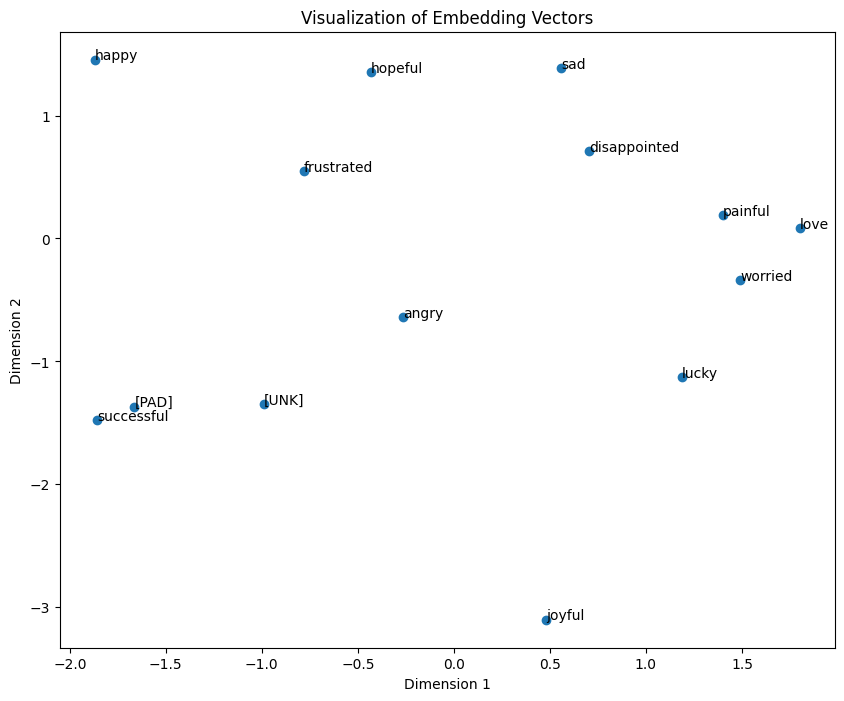

In [3]:
def visualization(embedding_matrix, num2token):
    
    # 提取降維後的坐標
    x_coords = embedding_matrix[:, 0]
    y_coords = embedding_matrix[:, 1]

    # 繪製詞嵌入向量的散點圖
    plt.figure(figsize=(10, 8))
    plt.scatter(x_coords, y_coords)

    # 標註散點
    for i in range(len(embedding_matrix)):
        plt.annotate(num2token[i], (x_coords[i], y_coords[i]))
        
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Visualization of Embedding Vectors')
    plt.show()
    
    

# 取得所有轉換後的詞彙
token_nums = torch.tensor([i for i in num2token])
# 創建一個詞嵌入層(Embedding layer)
emb = nn.Embedding(len(token_nums), 2)
# 將Token映射到詞嵌入層中
embedding_matrix = emb(token_nums).detach().numpy()
# 顯示該向量
visualization(embedding_matrix, num2token)

# 讀取模型看訓練後的向量

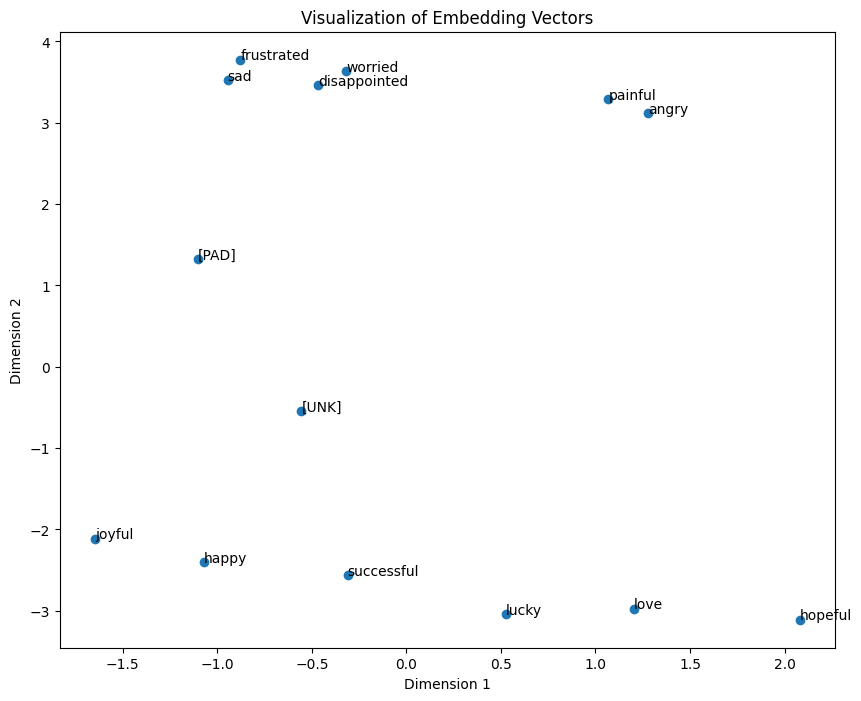

In [4]:
emb = nn.Embedding(len(token_nums), 2)
emb.weight = nn.Parameter(torch.load('embedding_weights.pth'))
embedding_vector = emb(token_nums).detach().numpy()
visualization(embedding_vector, num2token)